## Deep Learning with Tensorflow 2.0 Tutorial - Getting Started with Tensorflow 2.0 and Keras for Beginners

### What is Tensorflow?

Tensorflow architecture works in three parts:

- Preprocessing the data
- Build the model
- Train and estimate the model

I am assuming that you know a little about the machine learning and deep learning

### Why Every Data Scientist Learn Tensorflow 2.x not Tensorflow 1.x

- API Cleanup
- Eager execution
- No more globals
- Functions, not sessions (session.run())
- Use Keras layers and models to manage variables
- It is faster
- It takes less space
- More consistent
- and many more, watch Google I/O https://www.youtube.com/watch?v=lEljKc9ZtU8
- Github Link: https://github.com/tensorflow/tensorflow/releases

 ##### !pip install tensorflow==2.0.0-rc0 
 ##### !pip install tensorflow-gpu==2.0.0-rc0

## Import the Fashion MNIST dataset

[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
print(tf.__version__)

2.0.0-rc0


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
mnist = keras.datasets.fashion_mnist

In [7]:
type(mnist)

tensorflow.python.util.module_wrapper.TFModuleWrapper

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [10]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [12]:
np.max(X_train)

255

In [13]:
np.mean(X_train)

72.94035223214286

In [15]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
class_names = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

#### Data Exploration

In [17]:
X_train.shape

(60000, 28, 28)

In [18]:
X_test.shape

(10000, 28, 28)

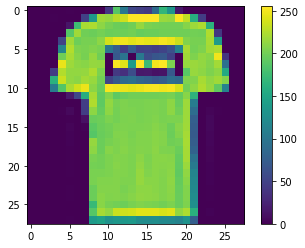

In [22]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

In [20]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [23]:
X_train = X_train/255.0

In [24]:
X_test = X_test/255.0

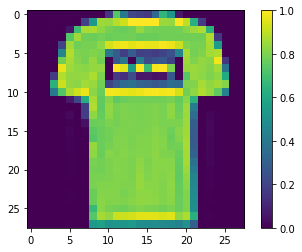

In [25]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

### Build the model with TF 2.0 

In [26]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [28]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#### model compilation
- Loss Function
- Optimizer
- Metrics

In [31]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [32]:
model.fit(X_train, y_train, epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.4974 - accuracy: 0.8253
Epoch 2/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3731 - accuracy: 0.8665
Epoch 3/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3355 - accuracy: 0.8783
Epoch 4/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3106 - accuracy: 0.8858
Epoch 5/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2955 - accuracy: 0.8917
Epoch 6/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2816 - accuracy: 0.8955
Epoch 7/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2689 - accuracy: 0.9002
Epoch 8/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2579 - accuracy: 0.9043
Epoch 9/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2483 - accuracy: 0.9068
Epoch 10/10
60

In [33]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.8875


In [34]:
from sklearn.metrics import accuracy_score

In [35]:
y_pred = model.predict_classes(X_test)

In [36]:
accuracy_score(y_test, y_pred)

0.8875

In [39]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [37]:
pred = model.predict(X_test)

In [38]:
pred

array([[1.67702035e-06, 1.03675714e-10, 1.47391557e-08, ...,
        1.59264840e-02, 9.40887389e-07, 9.83862460e-01],
       [9.19285929e-04, 1.07553154e-10, 9.97581959e-01, ...,
        2.44025178e-14, 9.26986266e-10, 8.40746336e-14],
       [2.25676882e-08, 1.00000000e+00, 8.14414421e-12, ...,
        7.44099095e-22, 4.35532383e-12, 1.78033856e-18],
       ...,
       [1.83690881e-05, 8.94168095e-13, 1.82772510e-06, ...,
        2.27158270e-09, 9.99949574e-01, 1.36851502e-10],
       [7.69025661e-08, 9.99978304e-01, 2.55842542e-10, ...,
        1.26080613e-12, 9.31746058e-09, 1.08685023e-11],
       [6.58440558e-06, 4.81366502e-09, 2.22436593e-05, ...,
        7.33801443e-03, 1.09489942e-04, 2.24496307e-05]], dtype=float32)

In [40]:
pred[0]

array([1.67702035e-06, 1.03675714e-10, 1.47391557e-08, 1.43644374e-10,
       2.31243913e-08, 2.08095837e-04, 2.65245745e-07, 1.59264840e-02,
       9.40887389e-07, 9.83862460e-01], dtype=float32)

In [41]:
np.argmax(pred[0])

9

In [42]:
np.argmax(pred[1])

2